In [46]:
!pip install requests pandas

Defaulting to user installation because normal site-packages is not writeable


In [47]:
import requests

In [53]:
CLIENT_ID = 154543
CLIENT_SECRET = 'e95ea1374cf55a20af635cf39c09fbec0cd15229'
AUTH_CODE = '70309f29c616892f26076b1db8c5305ce32f4c1a'

In [54]:
auth_url = 'https://www.strava.com/oauth/token'
payload = {
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
    'code': AUTH_CODE,
    'grant_type': 'authorization_code'
}

response = requests.post(auth_url, data=payload)
strava_tokens = response.json()
access_token = strava_tokens['access_token']

In [55]:
print("Access Token:", access_token)  # just to verify

Access Token: 408907a77d7b7158d59de384d8b1ac37f6650385


In [56]:
import pandas as pd

In [57]:
data = []
for activity in activities:
    data.append({
        'name': activity['name'],
        'distance_km': round(activity['distance'] / 1000, 2),
        'moving_time_min': round(activity['moving_time'] / 60, 2),
        'elapsed_time_min': round(activity['elapsed_time'] / 60, 2),
        'total_elevation_gain': activity['total_elevation_gain'],
        'type': activity['type'],
        'start_date': activity['start_date_local'],
        'average_speed_kmh': round(activity['average_speed'] * 3.6, 2),
        'max_speed_kmh': round(activity['max_speed'] * 3.6, 2),
        'has_heartrate': activity.get('has_heartrate', False),
        'average_heartrate': activity.get('average_heartrate'),
        'max_heartrate': activity.get('max_heartrate'),
    })


In [58]:
df = pd.DataFrame(data)
df.head()

,name,distance_km,moving_time_min,elapsed_time_min,total_elevation_gain,type,start_date,average_speed_kmh,max_speed_kmh,has_heartrate,average_heartrate,max_heartrate
0,Evening Ride,20.15,77.08,78.50,100.1,Ride,2025-04-05T19:01:56Z,15.69,44.28,False,None,None
1,20 kms wasn't sufficient,9.88,37.92,37.93,36.3,Ride,2025-04-02T20:09:46Z,15.64,26.50,False,None,None
2,Mehh,20.07,75.75,76.02,79.4,Ride,2025-04-02T18:50:52Z,15.90,26.35,False,None,None
3,Random,0.47,4.48,6.12,3.9,Ride,2025-04-02T12:01:04Z,6.25,14.47,False,None,None
4,"Told mess auntie nice earrings, gave massage t...",20.11,91.08,96.53,103.2,Ride,2025-04-01T19:11:53Z,13.25,39.17,False,None,None


In [59]:
df.to_csv('ridezilla_data.csv', index=False)

In [60]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  30 non-null     object 
 1   distance_km           30 non-null     float64
 2   moving_time_min       30 non-null     float64
 3   elapsed_time_min      30 non-null     float64
 4   total_elevation_gain  30 non-null     float64
 5   type                  30 non-null     object 
 6   start_date            30 non-null     object 
 7   average_speed_kmh     30 non-null     float64
 8   max_speed_kmh         30 non-null     float64
 9   has_heartrate         30 non-null     bool   
 10  average_heartrate     0 non-null      object 
 11  max_heartrate         0 non-null      object 
dtypes: bool(1), float64(6), object(5)
memory usage: 2.7+ KB


name                     0
distance_km              0
moving_time_min          0
elapsed_time_min         0
total_elevation_gain     0
type                     0
start_date               0
average_speed_kmh        0
max_speed_kmh            0
has_heartrate            0
average_heartrate       30
max_heartrate           30
dtype: int64

In [61]:
# Drop HR columns
df = df.drop(columns=['average_heartrate', 'max_heartrate'])

# Convert start_date to datetime
df['start_date'] = pd.to_datetime(df['start_date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   name                  30 non-null     object             
 1   distance_km           30 non-null     float64            
 2   moving_time_min       30 non-null     float64            
 3   elapsed_time_min      30 non-null     float64            
 4   total_elevation_gain  30 non-null     float64            
 5   type                  30 non-null     object             
 6   start_date            30 non-null     datetime64[ns, UTC]
 7   average_speed_kmh     30 non-null     float64            
 8   max_speed_kmh         30 non-null     float64            
 9   has_heartrate         30 non-null     bool               
dtypes: bool(1), datetime64[ns, UTC](1), float64(6), object(2)
memory usage: 2.3+ KB


In [62]:
df = df[df['type'].str.lower() == 'ride'].reset_index(drop=True)
print(f" Filtered dataset to only include cycling rides – total: {len(df)} rides.")

 Filtered dataset to only include cycling rides – total: 25 rides.


In [63]:
# Week & Month
df['week'] = df['start_date'].dt.isocalendar().week
df['month'] = df['start_date'].dt.month

# Pace = time / distance
df['pace_min_per_km'] = df['moving_time_min'] / df['distance_km']

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP\AppData\Local\Temp\ipykernel_24164\4016431569.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='average_speed_kmh', data=monthly_speed, palette='coolwarm')


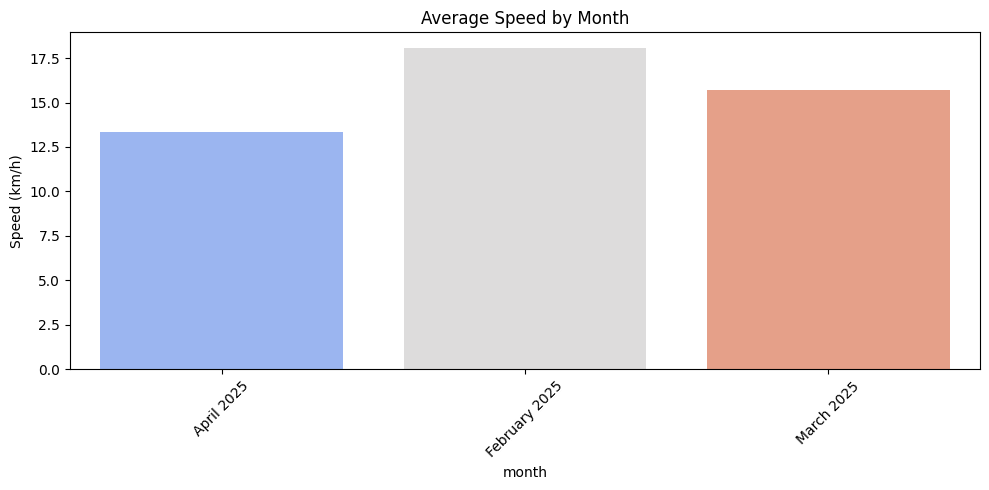

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Prepare Data
df['start_date'] = pd.to_datetime(df['start_date'])
df['month'] = df['start_date'].dt.strftime('%B %Y')  # e.g., 'March 2025'
df['pace_min_per_km'] = df['moving_time_min'] / df['distance_km']

# Step 2: Monthly Avg Speed Barplot
monthly_speed = df.groupby('month')['average_speed_kmh'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='month', y='average_speed_kmh', data=monthly_speed, palette='coolwarm')
plt.title("Average Speed by Month")
plt.xticks(rotation=45)
plt.ylabel("Speed (km/h)")
plt.tight_layout()
plt.show()

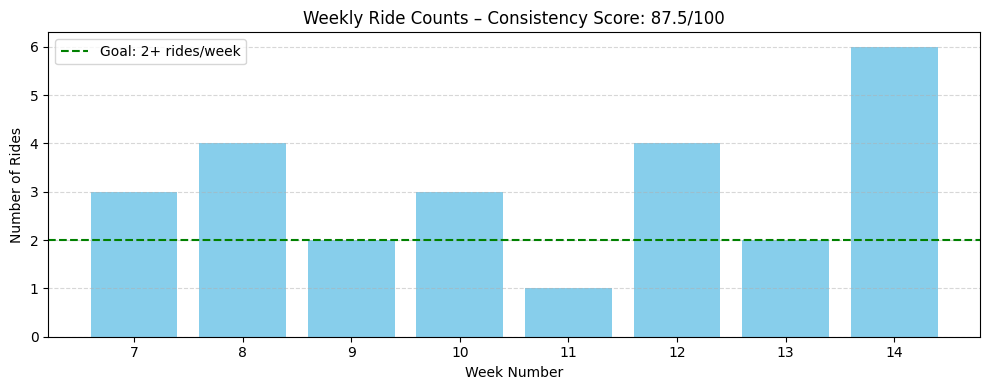

In [76]:
#underperformance
# Convert start_date to datetime
df['start_date'] = pd.to_datetime(df['start_date'])

# Count rides per week
df['week'] = df['start_date'].dt.isocalendar().week
weekly_counts = df['week'].value_counts().sort_index()

# Consistency score = % of weeks you rode at least twice
total_weeks = weekly_counts.count()
consistent_weeks = (weekly_counts >= 2).sum()
consistency_score = round((consistent_weeks / total_weeks) * 100, 1)

# Plot it
plt.figure(figsize=(10, 4))
plt.bar(weekly_counts.index, weekly_counts.values, color='skyblue')
plt.axhline(2, color='green', linestyle='--', label='Goal: 2+ rides/week')
plt.title(f'Weekly Ride Counts – Consistency Score: {consistency_score}/100')
plt.xlabel('Week Number')
plt.ylabel('Number of Rides')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

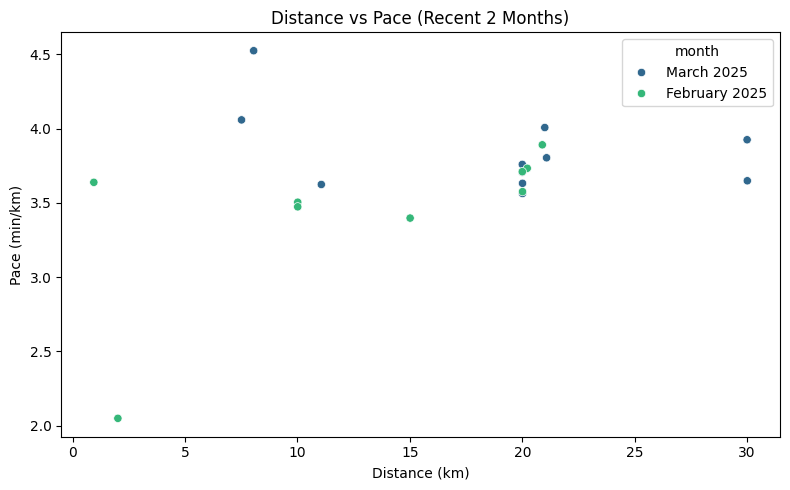

In [69]:
# Distance vs Pace (Recent 2 Months)
last_two_months = df['month'].unique()[-2:]  # assumes chronological order
df_recent = df[df['month'].isin(last_two_months)]

plt.figure(figsize=(8, 5))
sns.scatterplot(x='distance_km', y='pace_min_per_km', hue='month', data=df_recent, palette='viridis')
plt.title("Distance vs Pace (Recent 2 Months)")
plt.xlabel("Distance (km)")
plt.ylabel("Pace (min/km)")
plt.tight_layout()
plt.show()

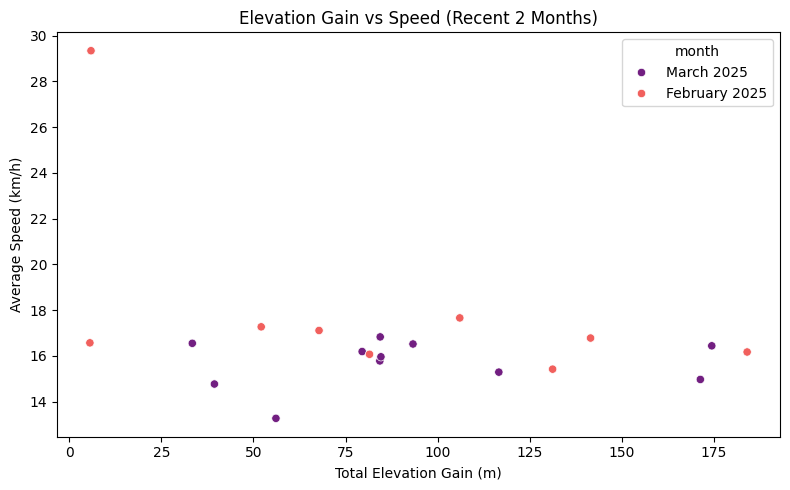

In [70]:
# Elevation vs Speed (Recent 2 Months)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='total_elevation_gain', y='average_speed_kmh', hue='month', data=df_recent, palette='magma')
plt.title("Elevation Gain vs Speed (Recent 2 Months)")
plt.xlabel("Total Elevation Gain (m)")
plt.ylabel("Average Speed (km/h)")
plt.tight_layout()
plt.show()

In [71]:
# Summary Recap & Suggestions
monthly_stats = df.groupby('month')[['distance_km', 'average_speed_kmh', 'moving_time_min']].mean().round(2)
this_month, last_month = monthly_stats.index[-1], monthly_stats.index[-2]

summary = f"""
Monthly Recap — {this_month}

Compared to {last_month}:
- Distance: {monthly_stats.loc[this_month, 'distance_km']} km vs {monthly_stats.loc[last_month, 'distance_km']} km
- Avg Speed: {monthly_stats.loc[this_month, 'average_speed_kmh']} km/h vs {monthly_stats.loc[last_month, 'average_speed_kmh']} km/h
- Avg Duration: {monthly_stats.loc[this_month, 'moving_time_min']} min vs {monthly_stats.loc[last_month, 'moving_time_min']} min

Suggestions:
"""

# Logic for suggestions
if monthly_stats.loc[this_month, 'average_speed_kmh'] < monthly_stats.loc[last_month, 'average_speed_kmh']:
    summary += "- Try interval training to boost pacing.\n"
else:
    summary += "- Keep up the strong pacing! Consider longer steady rides.\n"

if monthly_stats.loc[this_month, 'distance_km'] < monthly_stats.loc[last_month, 'distance_km']:
    summary += "- Increase weekly ride lengths to build endurance.\n"
else:
    summary += "- Excellent consistency in distance. Maintain this streak!\n"

if monthly_stats.loc[this_month, 'moving_time_min'] < monthly_stats.loc[last_month, 'moving_time_min']:
    summary += "- Ride a bit longer — shorter durations might be limiting progress.\n"
else:
    summary += "- Great ride duration! Keep pushing boundaries.\n"

print(summary)



Monthly Recap — March 2025

Compared to February 2025:
- Distance: 18.98 km vs 13.23 km
- Avg Speed: 15.69 km/h vs 18.04 km/h
- Avg Duration: 71.99 min vs 47.88 min

Suggestions:
- Try interval training to boost pacing.
- Excellent consistency in distance. Maintain this streak!
- Great ride duration! Keep pushing boundaries.



In [72]:
# 1. Calculate Overall Metrics
overall_avg_speed = df['average_speed_kmh'].mean()
df['pace_min_per_km'] = df['moving_time_min'] / df['distance_km']
overall_avg_pace = df['pace_min_per_km'].mean()

# 2. Flag Underperformance
df['underperformed'] = (df['average_speed_kmh'] < overall_avg_speed) | (df['pace_min_per_km'] > overall_avg_pace)

# 3. Summary Output
underperform_count = df['underperformed'].sum()
print(f" You underperformed in {underperform_count} out of {len(df)} rides.")
print(" These rides either had below-average speed or above-average pace.")

 You underperformed in 12 out of 25 rides.
 These rides either had below-average speed or above-average pace.


,name,start_date,average_speed_kmh,pace_min_per_km
0,Evening Ride,2025-04-05 19:01:56+00:00,15.69,3.825310
1,20 kms wasn't sufficient,2025-04-02 20:09:46+00:00,15.64,3.838057
2,Mehh,2025-04-02 18:50:52+00:00,15.90,3.774290
3,Random,2025-04-02 12:01:04+00:00,6.25,9.531915
4,"Told mess auntie nice earrings, gave massage t...",2025-04-01 19:11:53+00:00,13.25,4.529090
6,Small y,2025-03-30 20:20:06+00:00,14.77,4.058589
7,Sometimes it's not just a ride,2025-03-29 19:44:50+00:00,13.27,4.524224
8,21 km ride,2025-03-22 19:26:31+00:00,14.97,4.007143
9,19th March,2025-03-19 19:36:03+00:00,15.78,3.803605
10,Sankashta Chaturthi upvaas special,2025-03-18 19:00:57+00:00,15.96,3.759000


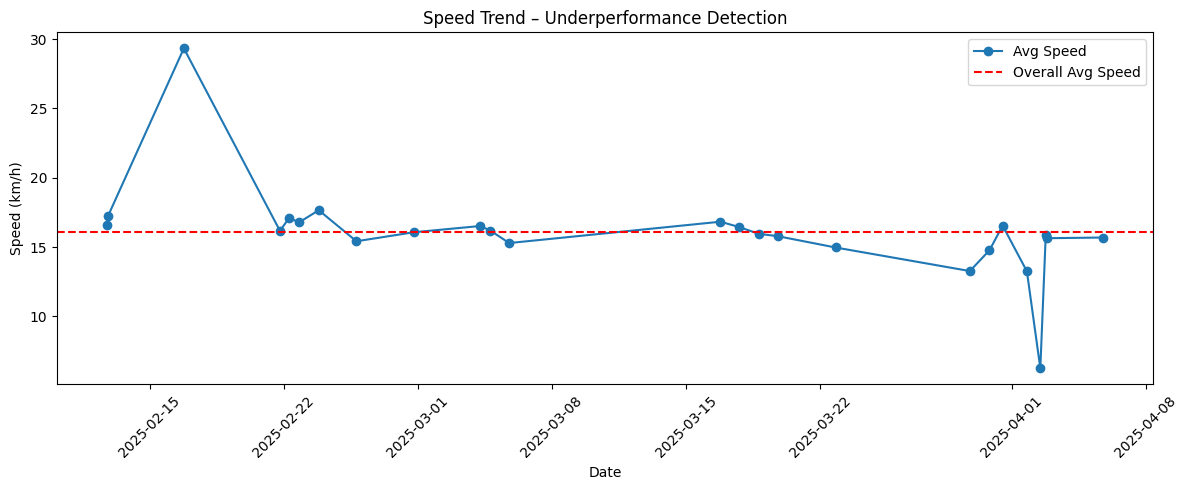

In [74]:
# View Underperforming Rides
underperform_rides = df[df['underperformed']][['name', 'start_date', 'average_speed_kmh', 'pace_min_per_km']]
display(underperform_rides)

# Speed Over Time with Underperformance Highlight
plt.figure(figsize=(12, 5))
plt.plot(df['start_date'], df['average_speed_kmh'], label='Avg Speed', marker='o')
plt.axhline(overall_avg_speed, color='red', linestyle='--', label='Overall Avg Speed')
plt.xticks(rotation=45)
plt.title('Speed Trend – Underperformance Detection')
plt.xlabel('Date')
plt.ylabel('Speed (km/h)')
plt.legend()
plt.tight_layout()
plt.show()

In [77]:
#ride performance predictor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Drop yoga or non-cycling rides if not already done
df = df[df['type'] == 'Ride']

# Define input features (X) and target variable (y)
X = df[['distance_km', 'total_elevation_gain', 'moving_time_min']]
y = df['average_speed_kmh']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
print("Model Evaluation:")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")

Model Evaluation:
R² Score: -0.17
Mean Squared Error: 0.68


In [79]:
# example: a 25 km ride with 300 m elevation gain taking ~80 minutes
future_ride = pd.DataFrame({
    'distance_km': [25],
    'total_elevation_gain': [300],
    'moving_time_min': [80]
})

predicted_speed = model.predict(future_ride)[0]
print(f" Expected average speed: {predicted_speed:.2f} km/h for the next ride.")

 Expected average speed: 20.16 km/h for the next ride.


In [80]:
#ride habit heatmap
# Ensure start_date is datetime
df['start_date'] = pd.to_datetime(df['start_date'])

# Extract weekday and week number
df['weekday'] = df['start_date'].dt.day_name()
df['week'] = df['start_date'].dt.isocalendar().week
df['month'] = df['start_date'].dt.strftime('%B %Y')  # Optional: for grouping

# Filter just 'Ride' activities
df_rides = df[df['type'] == 'Ride']

In [82]:
# Step 1: Convert to datetime and extract necessary fields
df['start_date'] = pd.to_datetime(df['start_date'])
df['weekday'] = df['start_date'].dt.day_name()
df['week'] = df['start_date'].dt.isocalendar().week

# Only keep ride entries
df_rides = df[df['type'] == 'Ride']

# Step 2: Create the pivot table
heatmap_data = df_rides.pivot_table(index='week', columns='weekday', values='name', aggfunc='count').fillna(0)

# Step 3: Reindex the columns safely
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(columns=ordered_days, fill_value=0)

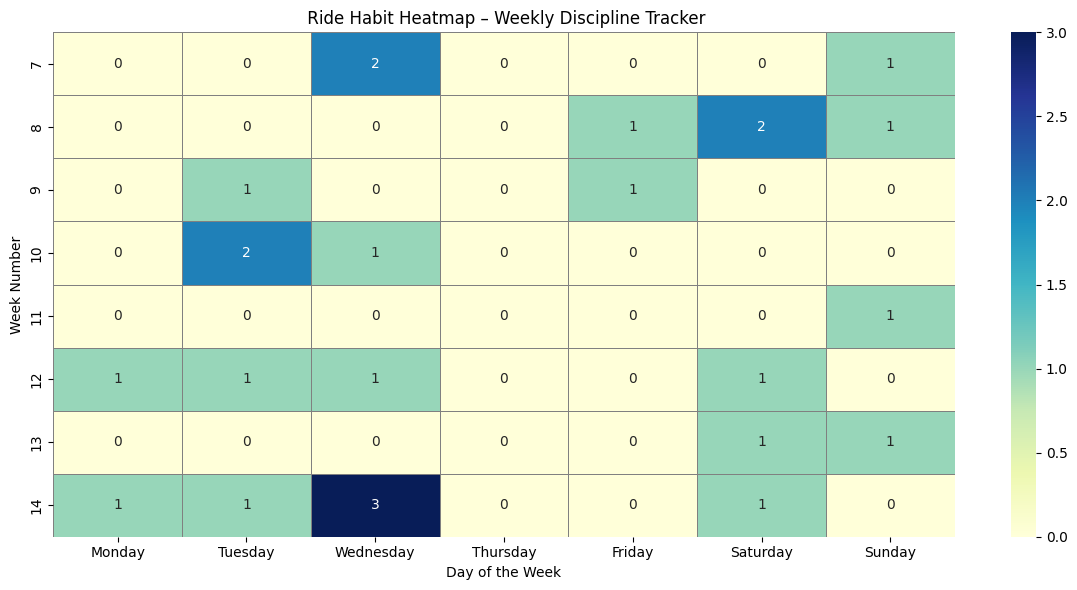

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title(" Ride Habit Heatmap – Weekly Discipline Tracker")
plt.xlabel("Day of the Week")
plt.ylabel("Week Number")
plt.tight_layout()
plt.show()

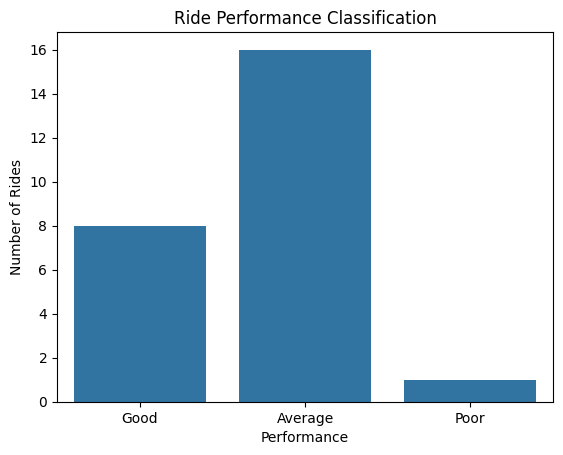

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for clustering
features = df[['distance_km', 'moving_time_min', 'average_speed_kmh', 'total_elevation_gain']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['performance_cluster'] = kmeans.fit_predict(scaled_features)

# Map cluster labels to performance levels based on average speed
cluster_avg_speed = df.groupby('performance_cluster')['average_speed_kmh'].mean()
sorted_clusters = cluster_avg_speed.sort_values(ascending=False).index.tolist()

performance_map = {sorted_clusters[0]: 'Good', sorted_clusters[1]: 'Average', sorted_clusters[2]: 'Poor'}
df['performance_label'] = df['performance_cluster'].map(performance_map)

# Visualize cluster distribution
sns.countplot(x='performance_label', data=df, order=['Good', 'Average', 'Poor'])
plt.title('Ride Performance Classification')
plt.xlabel("Performance")
plt.ylabel("Number of Rides")
plt.show()